###  Corona vaccine progress 
version 0.89 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-02 00:40:17.216618


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,source_name,source_website,vaccines,last_observation_date
0,Argentina,ARG,Government of Argentina,https://www.argentina.gob.ar/noticias/ministro...,Sputnik V,2020-12-29
1,Austria,AUT,Federal Ministry for Social Affairs and Health,https://www.sozialministerium.at/Informationen...,Pfizer/BioNTech,2020-12-30
2,Bahrain,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-01
3,Bulgaria,BGR,Ministry of Health,https://coronavirus.bg/bg/statistika,Pfizer/BioNTech,2021-01-01
4,Canada,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,Pfizer/BioNTech,2020-12-31
5,Chile,CHL,Department of Statistics and Health Information,https://deis.minsal.cl/,Pfizer/BioNTech,2020-12-27
6,China,CHN,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...,"CNBG, Sinovac",2020-12-31
7,Costa Rica,CRI,Government of Costa Rica,https://www.presidencia.go.cr/comunicados/2020...,Pfizer/BioNTech,2020-12-24
8,Croatia,HRV,Ministry of Health,https://vlada.gov.hr/news/government-approves-...,Pfizer/BioNTech,2020-12-30
9,Denmark,DNK,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,Pfizer/BioNTech,2020-12-31


In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url,iso_code,source_name,source_website,vaccines,last_observation_date,_merge
99,Oman,2021-01-01,Pfizer/BioNTech,6516,https://twitter.com/OmaniMOH/status/1344938163...,OMN,Ministry of Health,https://twitter.com/OmaniMOH/status/1344938163...,Pfizer/BioNTech,2021-01-01,both
11,Bahrain,2021-01-01,Sinopharm,59351,https://twitter.com/MOH_Bahrain/status/1345086...,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-01,both
52,Estonia,2021-01-01,Pfizer/BioNTech,2487,https://www.terviseamet.ee/et/uudised/covid-19...,EST,National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...,Pfizer/BioNTech,2021-01-01,both
117,United Kingdom,2021-01-01,Pfizer/BioNTech,1000000,https://twitter.com/MattHancock/status/1344987...,GBR,Government of the United Kingdom,https://twitter.com/MattHancock/status/1344987...,Pfizer/BioNTech,2021-01-01,both
109,Romania,2021-01-01,Pfizer/BioNTech,11656,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,Pfizer/BioNTech,2021-01-01,both
14,Bulgaria,2021-01-01,Pfizer/BioNTech,4739,https://coronavirus.bg/bg/statistika,BGR,Ministry of Health,https://coronavirus.bg/bg/statistika,Pfizer/BioNTech,2021-01-01,both
79,Israel,2021-01-01,Pfizer/BioNTech,1000000,https://twitter.com/YuliEdelstein/status/13449...,ISR,Government of Israel,https://twitter.com/YuliEdelstein/status/13449...,Pfizer/BioNTech,2021-01-01,both
83,Italy,2021-01-01,Pfizer/BioNTech,35850,https://bit.ly/vaccini_covid19,ITA,Commissioner for the COVID-19 emergency,https://bit.ly/vaccini_covid19,Pfizer/BioNTech,2021-01-01,both
51,Estonia,2020-12-31,Pfizer/BioNTech,1907,https://www.terviseamet.ee/et/uudised/covid-19...,EST,National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...,Pfizer/BioNTech,2021-01-01,both
78,Israel,2020-12-31,Pfizer/BioNTech,949112,https://t.me/s/MOHreport,ISR,Government of Israel,https://twitter.com/YuliEdelstein/status/13449...,Pfizer/BioNTech,2021-01-01,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada              18
Israel              13
Bahrain             10
United States        7
Denmark              5
Germany              5
Estonia              5
Mexico               5
Italy                4
Chile                4
Romania              4
Hungary              4
Oman                 4
Poland               4
Wales                3
Northern Ireland     3
Scotland             3
Bulgaria             3
United Kingdom       3
Russia               2
China                2
Portugal             2
England              2
Costa Rica           1
Austria              1
France               1
Croatia              1
Argentina            1
Ireland              1
Luxembourg           1
Finland              1
Latvia               1
Iceland              1
Lithuania            1
Kuwait               1
Greece               1
Name: location, dtype: int64

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Argentina         Sputnik V                    1
Austria           Pfizer/BioNTech              1
Bahrain           Sinopharm                   10
Bulgaria          Pfizer/BioNTech              3
Canada            Pfizer/BioNTech             18
Chile             Pfizer/BioNTech              4
China             CNBG, Sinovac                2
Costa Rica        Pfizer/BioNTech              1
Croatia           Pfizer/BioNTech              1
Denmark           Pfizer/BioNTech              5
England           Pfizer/BioNTech              2
Estonia           Pfizer/BioNTech              5
Finland           Pfizer/BioNTech              1
France            Pfizer/BioNTech              1
Germany           Pfizer/BioNTech              5
Greece            Pfizer/BioNTech              1
Hungary           Pfizer/BioNTech              4
Iceland           Pfizer/BioNTech              1
Ireland           Pfizer/BioNTech              1
Israel            Pfizer/B

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 124
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               117 non-null    object        
 1   date                   117 non-null    datetime64[ns]
 2   vaccine                117 non-null    object        
 3   total_vaccinations     117 non-null    int64         
 4   source_url             117 non-null    object        
 5   iso_code               117 non-null    object        
 6   source_name            117 non-null    object        
 7   source_website         117 non-null    object        
 8   vaccines               117 non-null    object        
 9   last_observation_date  117 non-null    object        
 10  _merge                 117 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 10.3+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


9 896 753 (32, 3)


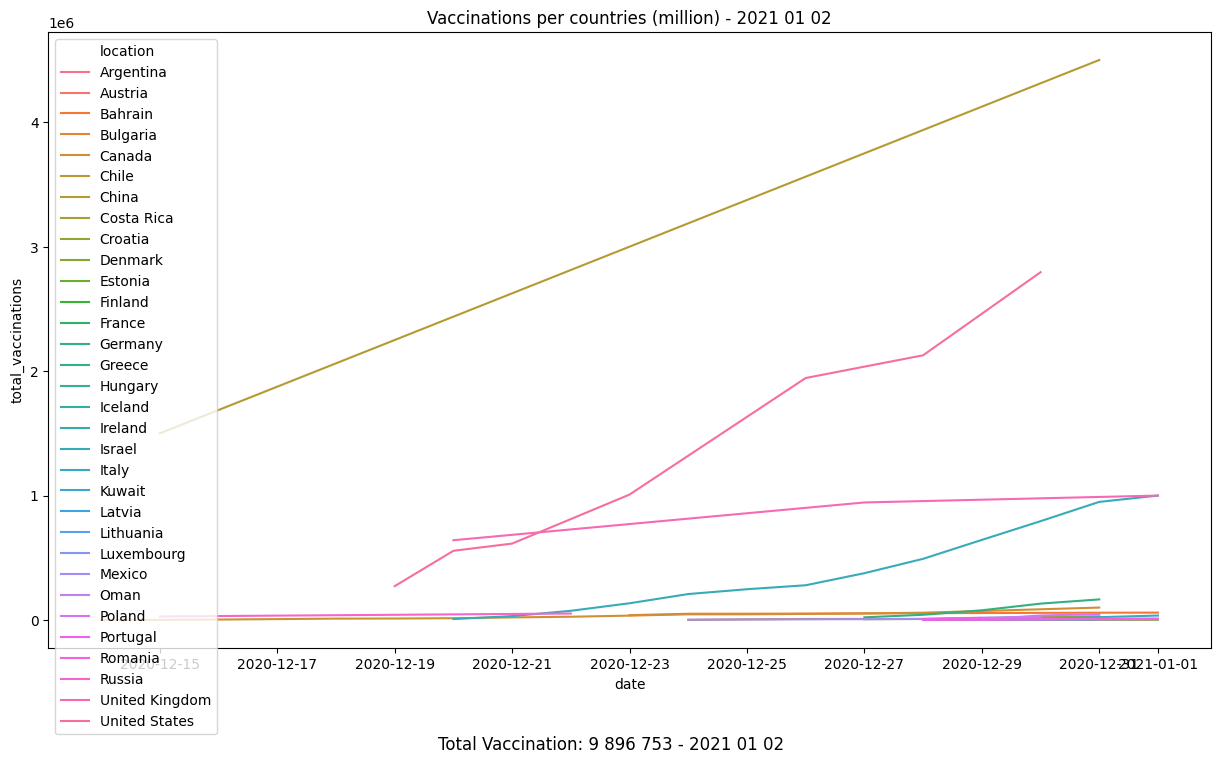

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


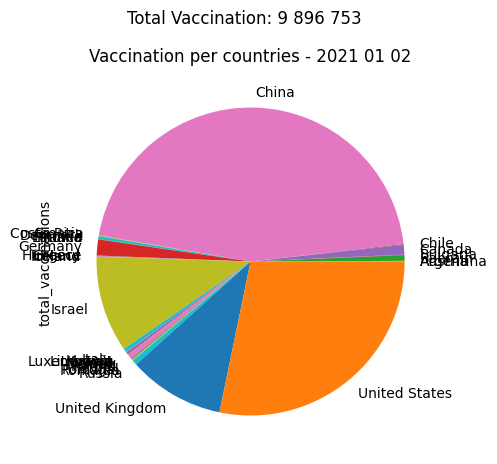

In [11]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [12]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
China,4500000,"CNBG, Sinovac",CHN
United States,2794588,"Moderna, Pfizer/BioNTech",USA
United Kingdom,1000000,Pfizer/BioNTech,GBR
Israel,1000000,Pfizer/BioNTech,ISR
Germany,165575,Pfizer/BioNTech,DEU
Canada,99946,Pfizer/BioNTech,CAN
Bahrain,59351,Sinopharm,BHR
Russia,52000,Sputnik V,RUS
Poland,47600,Pfizer/BioNTech,POL


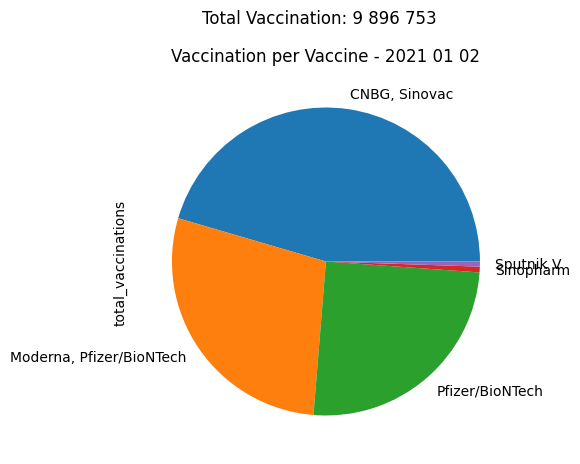

In [13]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [14]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                     52700
Sinopharm                     59351
Pfizer/BioNTech             2490114
Moderna, Pfizer/BioNTech    2794588
CNBG, Sinovac               4500000
Name: total_vaccinations, dtype: int64

In [15]:
# Sweden have 10 000 doses....
#allCountries

In [16]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-02 00:40:29.935167
Time elapsed (hh:mm:ss.ms) 0:00:12.718742


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [17]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp2 
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1. }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita. }
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
  }

SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF"""


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
dtypes: object(10)
memory usage: 15.3+ KB


In [18]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF
112,http://www.wikidata.org/entity/Q1008,Africa,false,Ivory Coast,Q1008,24294750,CIV,1398.99,false,false
9,http://www.wikidata.org/entity/Q967,Africa,false,Burundi,Q967,10864245,BDI,292,false,false
141,http://www.wikidata.org/entity/Q837,Asia,false,Nepal,Q837,29400000,NPL,849,false,false
43,http://www.wikidata.org/entity/Q27,Europe,true,Ireland,Q27,4761865,IRL,68885,false,false
142,http://www.wikidata.org/entity/Q801,Asia,false,Israel,Q801,9093000,ISR,40543,false,false


In [19]:
#All datat as Line Grapoh
#CountriesDataAll = pd.merge(allCountriesFiltered, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" )   
#CountriesDataAll['population'] = CountriesData['population'].astype(int)

#CountriesDataAll["vaccinations_population_percent"] = CountriesDataAll["total_vaccinations"]/CountriesDataAll["population"] * 100


#CountriesDataAll[1:100]

In [20]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,700,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,59351,Sinopharm,BHR
Bulgaria,4739,Pfizer/BioNTech,BGR
Canada,99946,Pfizer/BioNTech,CAN
Chile,8648,Pfizer/BioNTech,CHL
China,4500000,"CNBG, Sinovac",CHN
Costa Rica,55,Pfizer/BioNTech,CRI
Croatia,7864,Pfizer/BioNTech,HRV


In [21]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,_merge
0,700,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,both
2,59351,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,both
3,4739,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,both
4,99946,Pfizer/BioNTech,CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,both
5,8648,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,both
6,4500000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,both
7,55,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,both
8,7864,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,both
9,29483,Pfizer/BioNTech,DNK,http://www.wikidata.org/entity/Q35,Europe,true,Denmark,Q35,5827463,DNK,57218,false,false,both


In [22]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   32 non-null     int64   
 1   vaccine              32 non-null     object  
 2   iso_code             32 non-null     object  
 3   cid                  32 non-null     object  
 4   continent            32 non-null     object  
 5   memberEU             32 non-null     int64   
 6   country              32 non-null     object  
 7   qid                  32 non-null     object  
 8   population           32 non-null     int64   
 9   ISO3166_1            32 non-null     object  
 10  nominalGDPperCapita  32 non-null     float64 
 11  G20                  32 non-null     int64   
 12  IMF                  32 non-null     int64   
 13  _merge               32 non-null     category
dtypes: category(1), float64(1), int64(5), object(7)
memory usage: 3.6+ KB


In [23]:
#CountriesData

In [24]:
CountriesData['Country'] = CountriesData.index

In [25]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.357962
population                         0.904755
nominalGDPperCapita                0.005797
G20                                0.409270
IMF                               -0.079156
Country                            0.061324
vaccinations_population_percent    0.169650
Name: total_vaccinations, dtype: float64

In [26]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.169650
memberEU                          -0.318940
population                        -0.046489
nominalGDPperCapita                0.131653
G20                               -0.118144
IMF                               -0.088384
Country                            0.005400
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [27]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


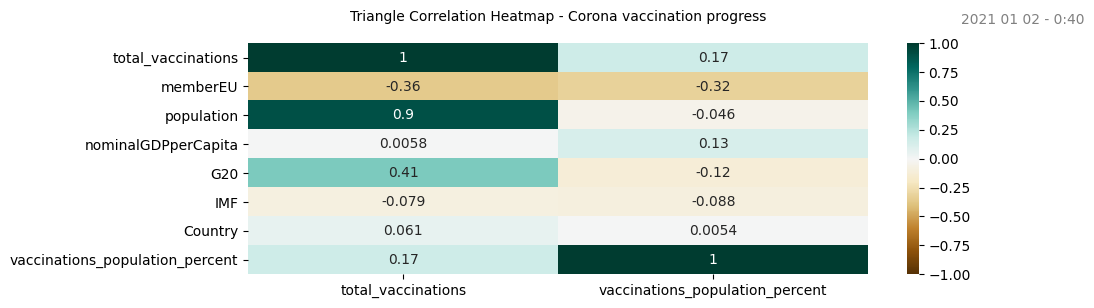

In [28]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [29]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,G20,continent,IMF,population,country,memberEU,vaccinations_population_percent,total_vaccinations
18,0,Asia,0,9093000,Israel,0,10.997471,1000000
2,0,Asia,0,1492584,Bahrain,0,3.976393,59351
30,1,Europe,0,66022273,United Kingdom,0,1.514640,1000000
16,0,Europe,0,357050,Iceland,0,1.365355,4875
31,1,North America,0,328239523,United States of America,0,0.851387,2794588
9,0,Europe,0,5827463,Denmark,1,0.505932,29483
6,1,Asia,0,1409517397,People's Republic of China,0,0.319258,4500000
4,1,North America,0,37894799,Canada,0,0.263746,99946
13,1,Europe,1,83149300,Germany,1,0.199130,165575
23,0,Europe,0,626108,Luxembourg,1,0.191660,1200


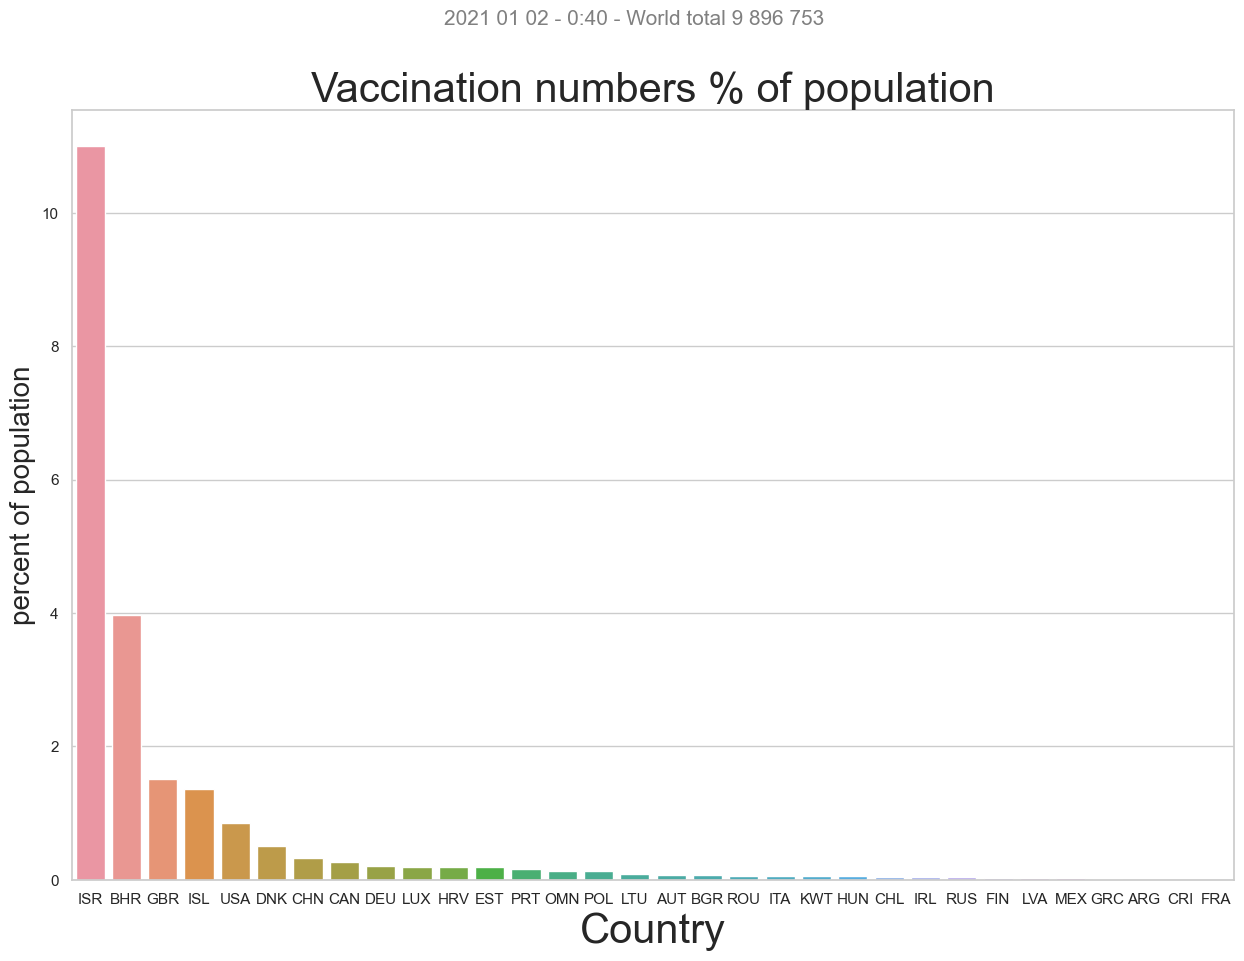

In [30]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

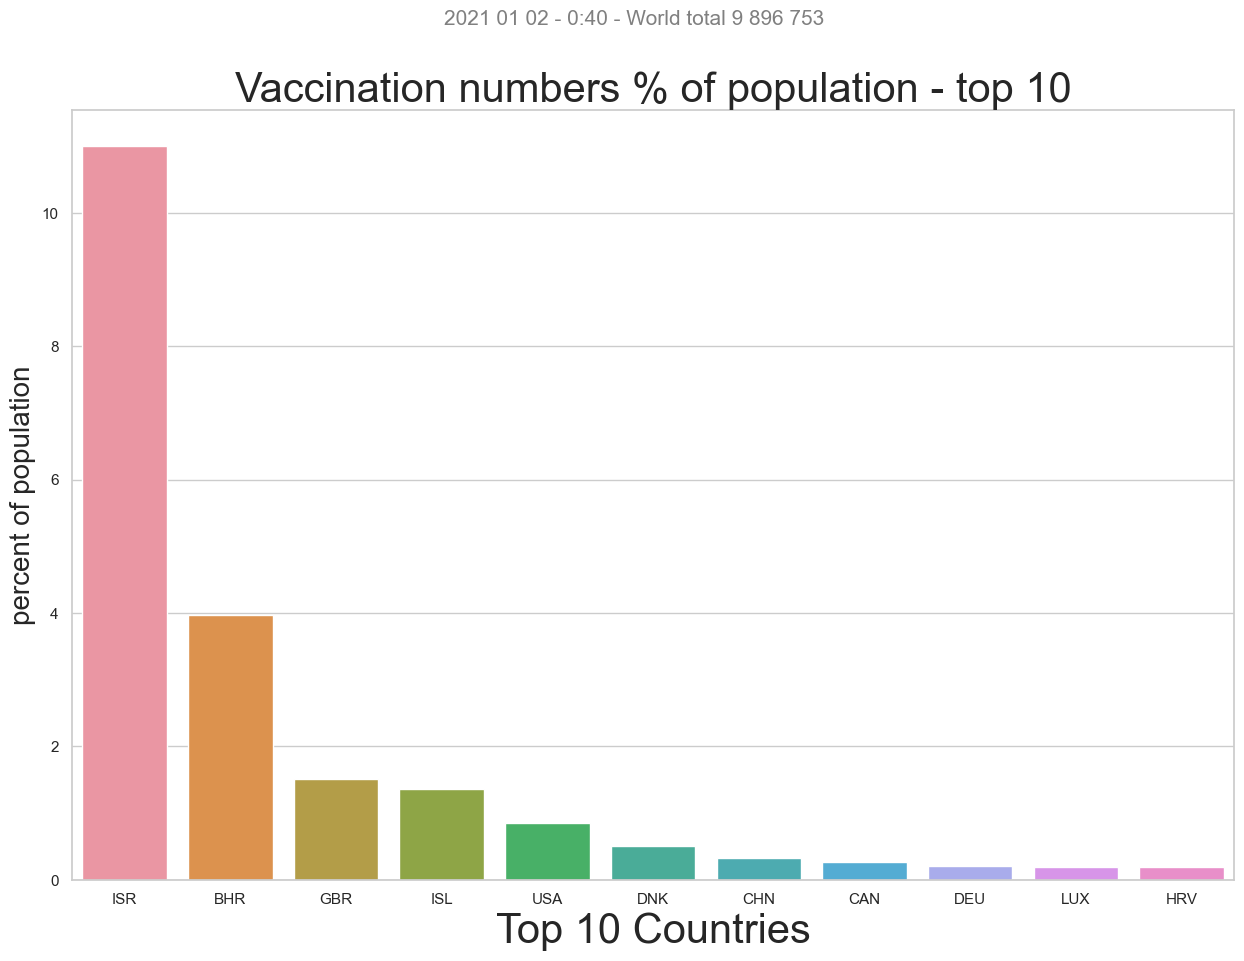

In [31]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

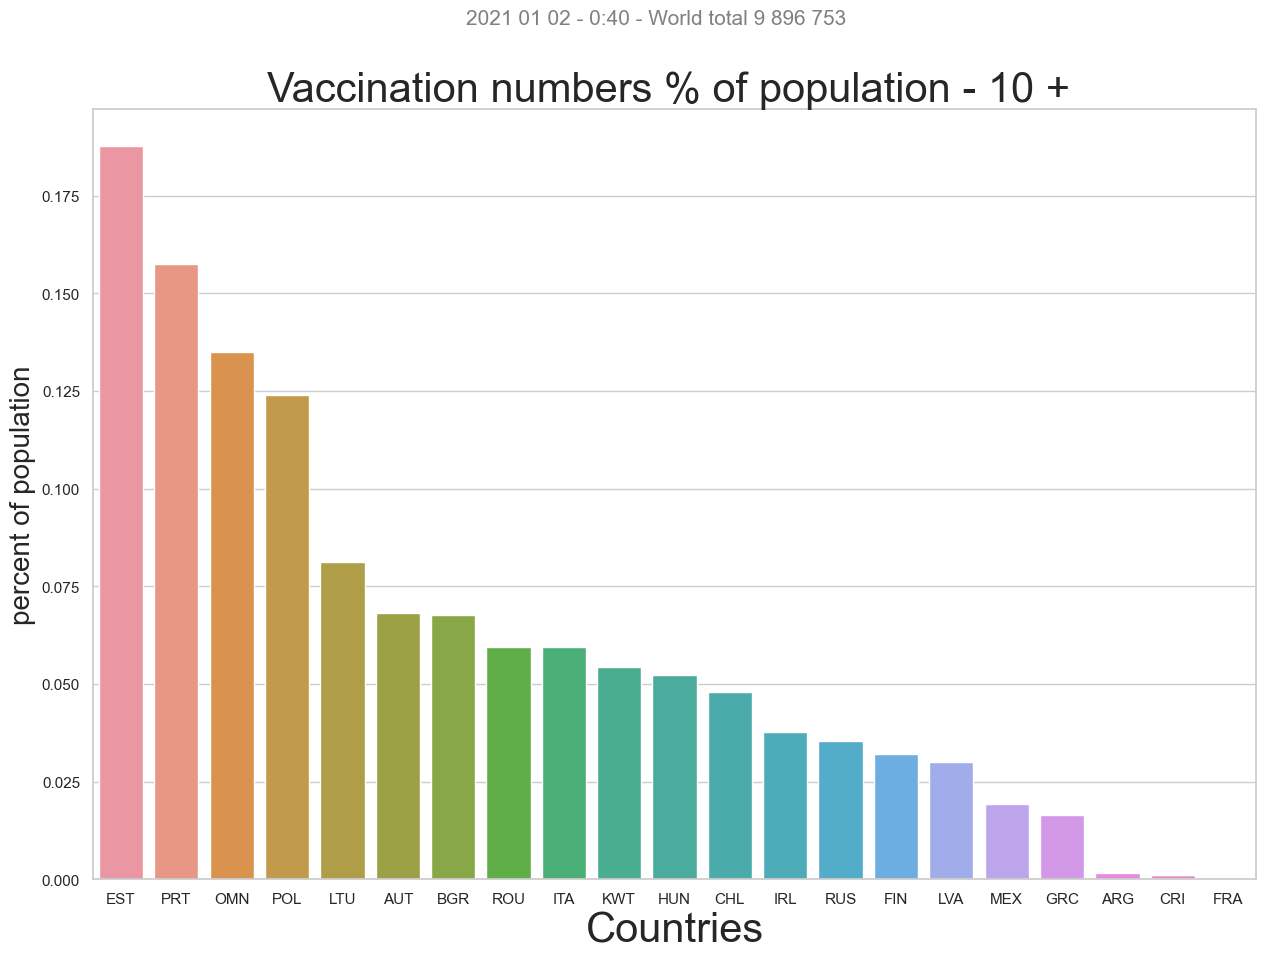

In [32]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

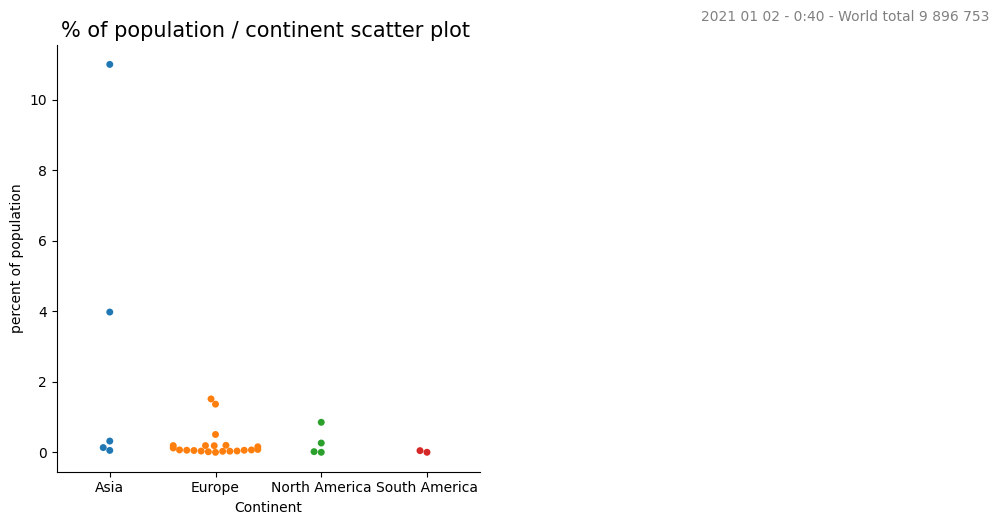

In [33]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

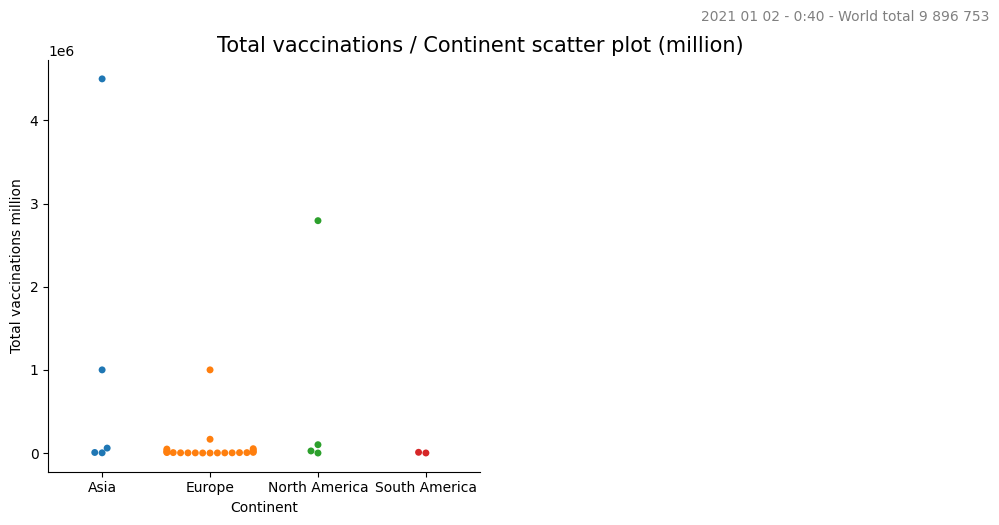

In [34]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [35]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

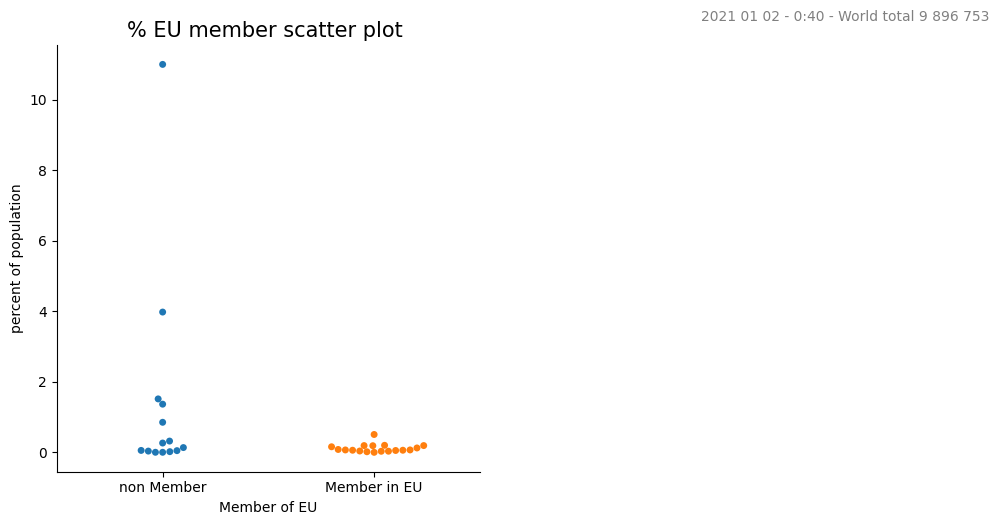

In [36]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

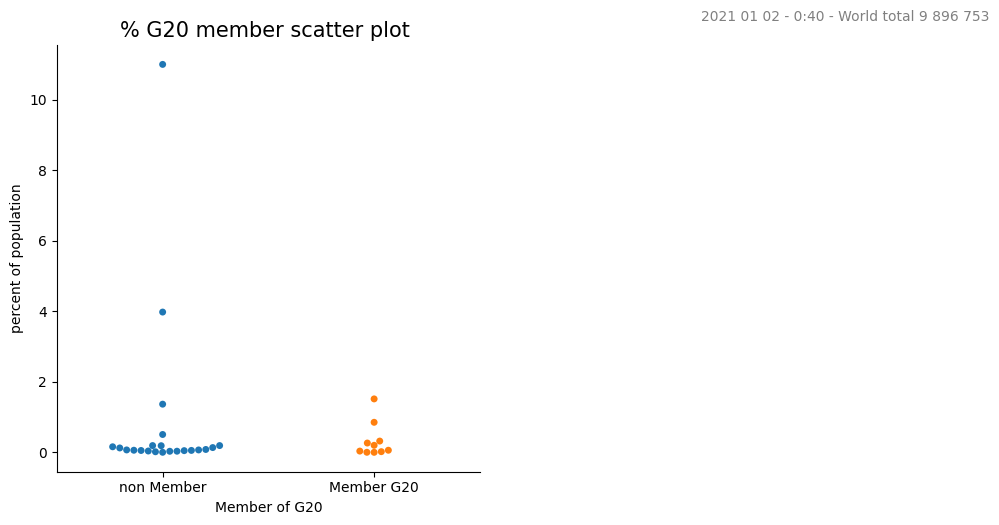

In [37]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

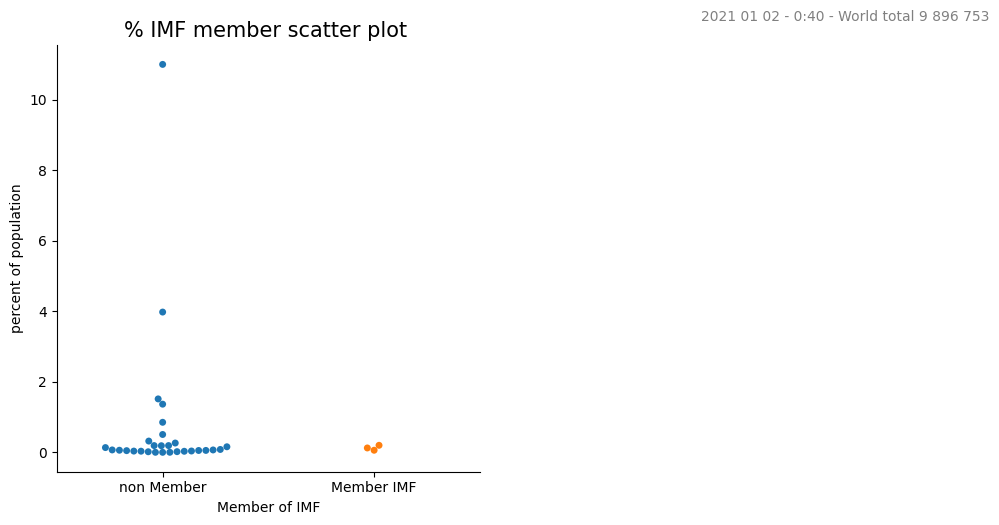

In [38]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [39]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


9 896 753 (32, 3) 1 399 451


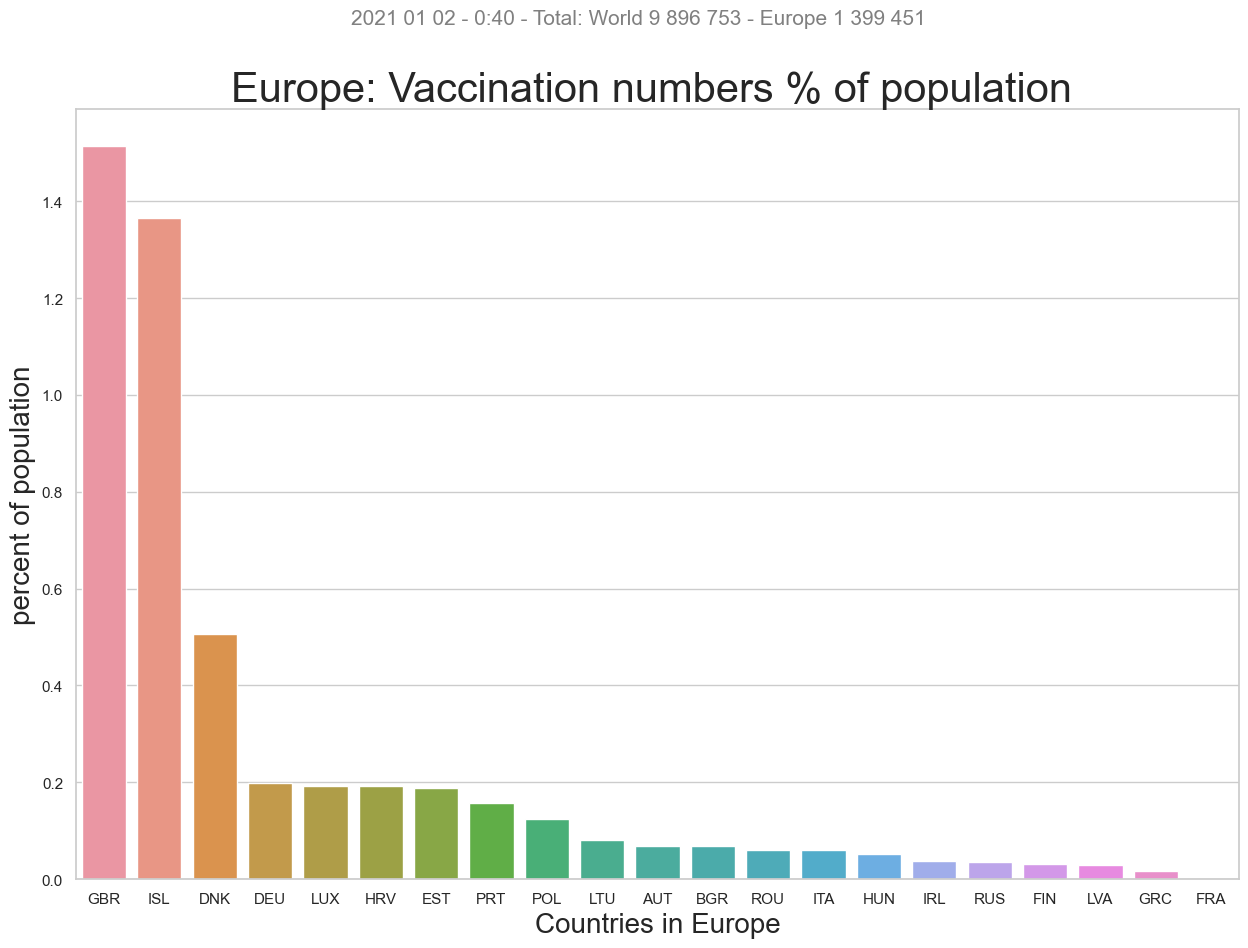

In [40]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [41]:
#CountriesDataEurope

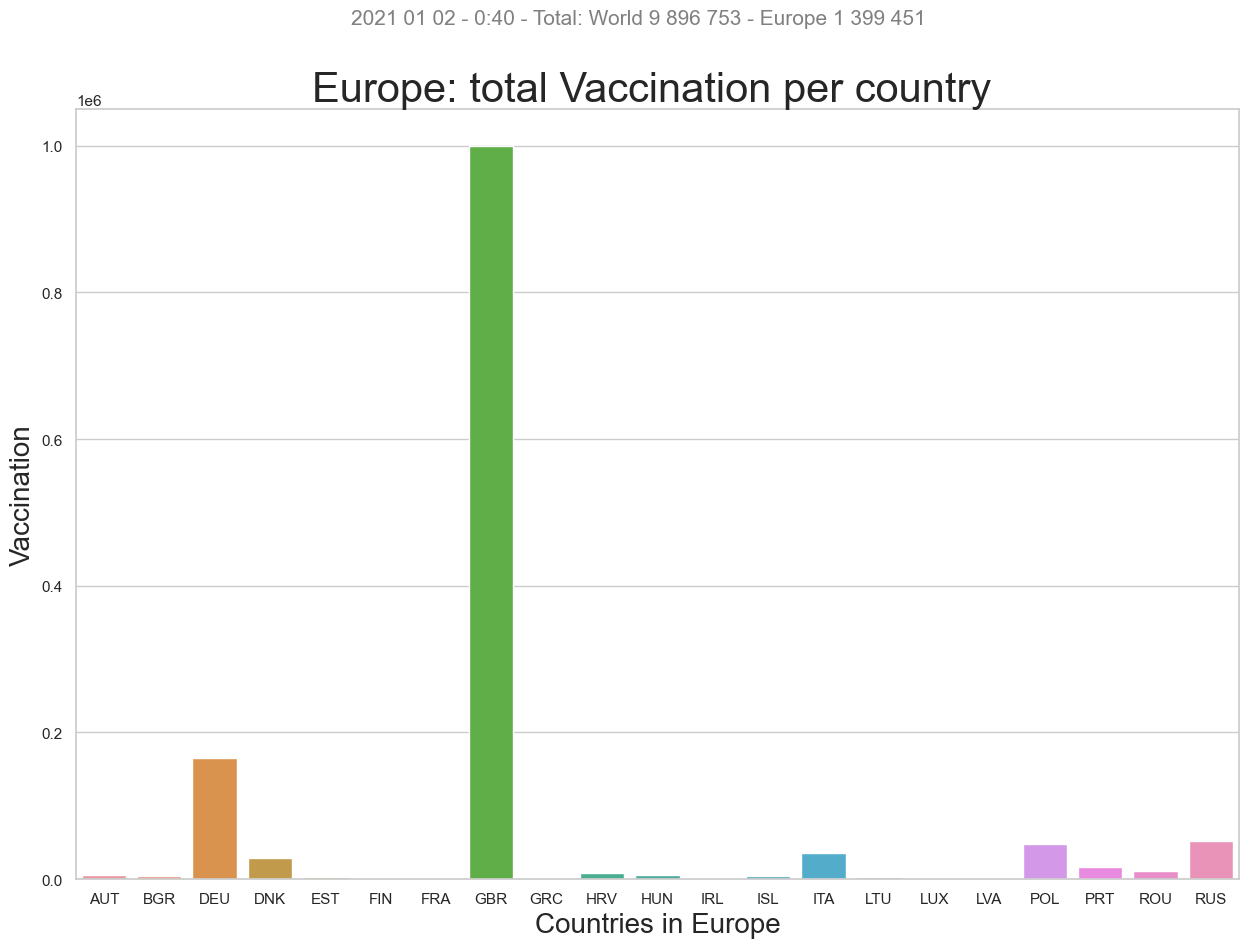

In [42]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [43]:
#WDpopulationEurope.info()

In [44]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)

# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,memberEU,vaccinations_population_percent,total_vaccinations,ISO3166_1,country_x
40,non Member,0.000000,0.0,ALB,Albania
31,non Member,0.000000,0.0,AND,Andorra
46,non Member,0.000000,0.0,ARM,Armenia
32,Member in EU,0.068111,6000.0,AUT,Austria
0,non Member,0.000000,0.0,AZE,Azerbaijan
6,Member in EU,0.000000,0.0,BEL,Belgium
33,Member in EU,0.067700,4739.0,BGR,Bulgaria
3,non Member,0.000000,0.0,BIH,Bosnia and Herzegovina
36,non Member,0.000000,0.0,BLR,Belarus
34,non Member,0.000000,0.0,CHE,Switzerland


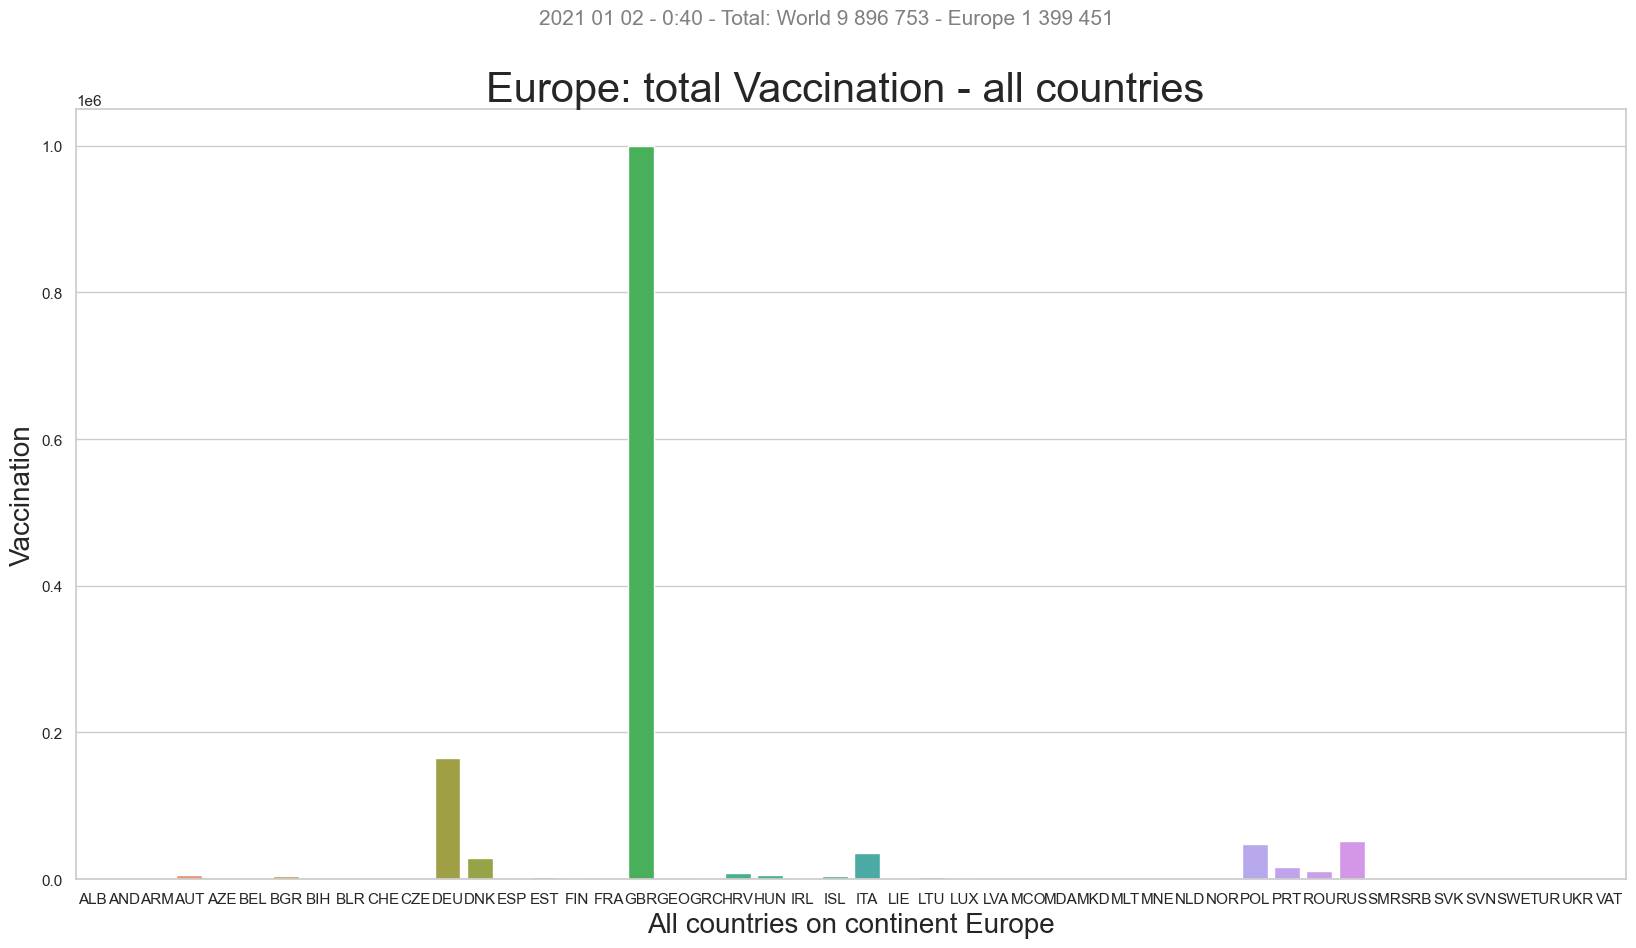

In [45]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [46]:
CountriesDataEuropeAll

,memberEU,vaccinations_population_percent,total_vaccinations,ISO3166_1,country_x
40,non Member,0.000000,0.0,ALB,Albania
31,non Member,0.000000,0.0,AND,Andorra
46,non Member,0.000000,0.0,ARM,Armenia
32,Member in EU,0.068111,6000.0,AUT,Austria
0,non Member,0.000000,0.0,AZE,Azerbaijan
6,Member in EU,0.000000,0.0,BEL,Belgium
33,Member in EU,0.067700,4739.0,BGR,Bulgaria
3,non Member,0.000000,0.0,BIH,Bosnia and Herzegovina
36,non Member,0.000000,0.0,BLR,Belarus
34,non Member,0.000000,0.0,CHE,Switzerland


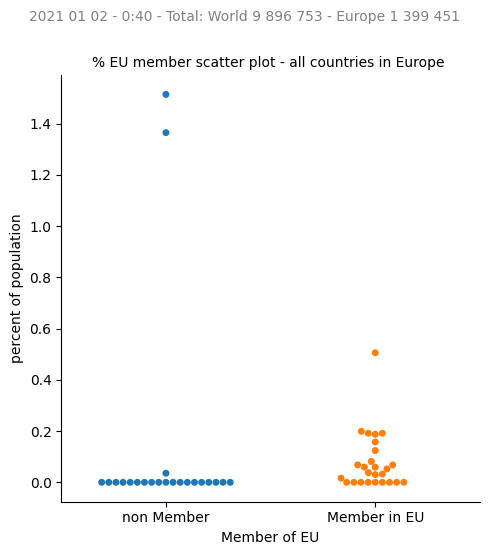

In [47]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [48]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

9 896 753 (32, 3) 1 399 451 (21, 19)


In [49]:
end = datetime.now()
print("Ended:a ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:a  2021-01-02 00:40:47.014818
Time elapsed (hh:mm:ss.ms) 0:00:29.798501


In [50]:
#The Global State of Democracy Indices
stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
df = pd.read_stata(stata_democracy_indices)

In [51]:
df.sample(10)

,ID,ID_country_name,ID_country_code,ID_year,ID_country_year,ID_region,ID_subregion,C_A1,L_A1,U_A1,C_SD11,L_SD11,U_SD11,C_SD12,C_SD13,L_SD13,U_SD13,C_SD14,L_SD14,U_SD14,C_A2,L_A2,U_A2,C_SD21,L_SD21,U_SD21,C_SD22,L_SD22,U_SD22,C_SD22A,L_SD22A,U_SD22A,C_SD22B,L_SD22B,U_SD22B,C_SD22C,L_SD22C,U_SD22C,C_SD22D,L_SD22D,...,v_23_36,v_23_37,v_31_01,v_31_02,v_31_03,v_31_04,v_31_05,v_32_01,v_32_02,v_32_03,v_32_04,v_32_05,v_32_06,v_33_01,v_33_02,v_33_03,v_33_04,v_33_05,v_41_01,v_41_02,v_41_03,v_41_04,v_41_05,v_42_01,v_42_02,v_42_03,v_42_04,v_42_05,v_42_06,v_51_01,v_51_02,v_51_03,v_51_04,v_51_05,v_51_06,v_52_01,v_53_01,v_53_02,v_54_01,v_54_02
6906,6907.0,ASEAN,962.0,1979.0,9621979.0,NaN,NaN,0.254825,0.189458,0.320192,0.266995,0.225447,0.308543,0.732688,0.252927,0.208105,0.297750,0.461064,0.328670,0.593459,0.352745,0.306117,0.399374,0.417136,0.387076,0.447195,0.246448,0.214194,0.278702,0.214470,0.179143,0.249797,0.210387,0.148349,0.272426,0.325552,0.259782,0.391321,0.276504,0.222616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7310,7311.0,Caribbean,976.0,1978.0,9761978.0,NaN,Caribbean,0.441427,0.377033,0.505820,0.455266,0.413014,0.497519,0.703768,0.476705,0.434329,0.519080,0.641839,0.475765,0.807913,0.509227,0.462378,0.556075,0.549833,0.519993,0.579674,0.476003,0.443669,0.508337,0.427419,0.395167,0.459670,0.477696,0.426044,0.529347,0.491367,0.417484,0.565250,0.468588,0.417073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,3507.0,Cameroon,471.0,1990.0,4711990.0,Africa,Central Africa,0.315232,0.250886,0.379577,0.365450,0.323917,0.406983,0.824356,0.384238,0.345280,0.423197,0.385041,0.257098,0.512985,0.445497,0.397638,0.493356,0.498672,0.469230,0.528114,0.442125,0.409997,0.474253,0.410478,0.383176,0.437781,0.386646,0.343118,0.430173,0.465293,0.395515,0.535072,0.563943,0.506548,...,0.666667,0.333333,0.329329,0.388089,0.359791,0.314464,0.166667,0.193907,0.212348,0.311732,0.342062,0.500000,0.5,0.479176,0.571598,0.409443,0.425467,0.0,0.144622,0.315670,0.347617,0.244926,0.500000,0.353320,0.413179,0.344146,0.278456,0.151077,0.750,0.551589,0.418554,0.388842,0.778254,0.600901,0.620063,0.6783,0.040973,0.333333,0.120603,0.185063
1430,1431.0,Switzerland,225.0,2010.0,2252010.0,Europe,North/Western Europe,0.870137,0.806425,0.933849,0.886069,0.843132,0.929006,0.961890,0.789874,0.748031,0.831718,1.000000,0.781772,1.218228,0.905237,0.856894,0.953581,0.931647,0.901825,0.961468,0.864225,0.832146,0.896303,0.880742,0.845356,0.916128,0.825257,0.781720,0.868793,0.604260,0.546415,0.662105,0.679540,0.633139,...,0.666667,1.000000,0.855848,0.814300,0.859474,0.792501,1.000000,0.910663,0.976228,0.983569,0.950920,0.833333,1.0,0.908377,0.908199,0.900363,0.903339,1.0,0.830959,0.818555,0.906631,0.893416,0.750000,0.905383,0.928403,0.894371,0.735566,0.677692,1.000,0.868355,0.918844,0.963931,NaN,NaN,0.511939,0.3979,0.869398,1.000000,0.995980,0.909034
3621,3622.0,Gabon,481.0,2015.0,4812015.0,Africa,Central Africa,0.422502,0.354048,0.490956,0.354432,0.311512,0.397351,0.858365,0.514053,0.473005,0.555101,0.609310,0.471251,0.747369,0.608677,0.560992,0.656362,0.635277,0.605849,0.664704,0.667945,0.635021,0.700870,0.638163,0.598651,0.677675,0.650024,0.598898,0.701150,0.664598,0.599180,0.730015,0.571593,0.520651,...,0.666667,0.000000,0.414778,0.212369,0.279309,0.570300,0.500000,0.457791,0.451978,0.427672,0.418525,0.500000,0.0,0.602546,0.899746,0.868467,0.524525,0.0,0.374564,0.372153,0.349271,0.413943,0.333333,0.494096,0.765327,0.720731,0.398878,0.297158,0.375,0.812992,0.685830,0.705714,NaN,NaN,NaN,0.2824,0.042254,0.666667,0.950754,0.424769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,